# Контрольное домашнее задание № 1.1
# Вариант 14

In [7]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
! pip install prettytable

In [3]:
from prettytable import PrettyTable

Рассматриваются $N$ проектов информационной системы. Каждый
проект оценивается векторным показателем эффективности
$F = [f_1,  f_2]$, компоненты которого требуется максимизировать

## 1. Исходные данные
Для формирования исходных данных сгенерировать случайным образом в пространстве критериев $(f_1, f_2)$   
$N = 20$ точек, равномерно распределенных на множестве достижимых векторных оценок, заданном
системой ограничений-неравенств:

\begin{cases}
    (f_1 - 14)^2 + (f_2 - 14)^2 <= 14^2  \\     
    - f_1 + f_2 <= 14  \\
    f_1 + f_2 >= 2*14 \\
\end{cases}


In [8]:
class tochka:
    def __init__(self, x, y, status=0, bi=0, findex=0, klaster=0):
        self.x = x
        self.y = y
        self.status = status
        self.bi = bi
        self.findex = findex
        self.klaster = klaster

In [9]:
number = 20
number = int(input("Введите количество точек: "))
n = 14
count = 0
list = []

Введите количество точек: 500


In [20]:
# тестовый набор
f1 = [8, 11, 12, 13, 14, 16, 16, 17, 19, 19, 19, 20, 21, 22, 23, 23, 24, 25, 26, 27]
f2 = [21, 24, 20, 16, 26, 14, 23, 19, 11, 15, 25, 20, 9, 16, 12, 22, 6, 10, 18, 14]

for i in range(20):
    x = f1[i]
    y = f2[i]
    list.append(tochka(x, y))
    count = count + 1
    print(count, '-', x, y)



1 - 8 21
2 - 11 24
3 - 12 20
4 - 13 16
5 - 14 26
6 - 16 14
7 - 16 23
8 - 17 19
9 - 19 11
10 - 19 15
11 - 19 25
12 - 20 20
13 - 21 9
14 - 22 16
15 - 23 12
16 - 23 22
17 - 24 6
18 - 25 10
19 - 26 18
20 - 27 14


In [10]:
# генератор случайных точек
while count < number:
    y = np.random.uniform(4, 28)
    x = np.random.uniform(7, 28)
    if (y <= n + x) and (y >= 2*n - x) and ((x - n)**2 + (y - n)**2 <= n**2):
        list.append(tochka(x, y))
        count = count + 1
#         print(count, '-', x, y)



Визуализация области ограничений и точек-проектов

In [11]:
# Визуализация области ограничений и точек-проектов
def drawing_graph():
    
    # -x+y<=14
    y1 = lambda x: n + x
    
    # x+y>=28
    y2 = lambda x: (n * 2) - x
    
    fig, axes = plt.subplots()
    x = np.linspace(-5, 30, 2)
    
    plt.plot(x, y1(x), 'k')
    plt.plot(x, y2(x), 'k')
    
    # окружность 
    circle = plt.Circle((n, n), n, color='k', fill=False)
    
    axes.set_aspect(1)
    axes.add_artist(circle)
    
    for i in range(number):
        plt.plot(list[i].x, list[i].y, '.', color='b')
        if number <= 20:
            plt.text(list[i].x + 0.1, list[i].y + 0.1, i + 1)
    
    
    plt.grid(True)
    plt.xlabel("f1")
    plt.ylabel("f2")
    plt.suptitle('Graf')

    plt.show()

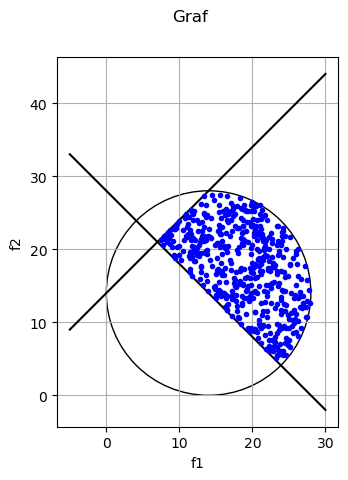

In [12]:
drawing_graph()

## 2. Определить множество эффективных проектов 
C помощью алгоритма исключения заведомо неэффективных решений.


In [13]:
def pareto():
    for i in range (number):
        for j in range(number):
            if (list[i].status == 0) and (i != j):
                if (list[j].x <= list[i].x) and (list[j].y <= list[i].y) and (list[j].status!=-1):
                    list[j].status = -1
                    j1 = j+1
                    

In [14]:
pareto()

Статус "-1" присваивается заведомо неэффективным решениям, статус "0" сохраняется у Парето-эффективных значений

In [15]:
pt1 = PrettyTable()
count = 0
pt1.field_names=['id', 'f1', 'f2']
for i in range(number):
    if list[i].status == 0:
        pt1.add_row([i + 1, list[i].x, list[i].y])
        count += 1
print('Всего Парето-эффективных точек -', count)
print(pt1)

Всего Парето-эффективных точек - 19
+-----+--------------------+--------------------+
|  id |         f1         |         f2         |
+-----+--------------------+--------------------+
|  10 | 24.403810502772743 | 21.83338279642772  |
|  36 | 21.090130902213765 | 26.033041594349243 |
| 128 | 21.71431420130463  |  24.6903165819969  |
| 179 | 26.296605027616927 | 19.975637367168698 |
| 184 | 24.127529085441328 | 22.850208906393313 |
| 203 | 27.211426023641085 | 17.76535519290212  |
| 230 | 19.913234549796602 | 26.51533462845561  |
| 236 | 23.50189351185328  | 23.22032993447159  |
| 241 | 16.539337713643647 | 27.28060169646837  |
| 283 | 15.571767123528065 | 27.40176618064907  |
| 289 | 18.308408104824483 | 26.979393762337523 |
| 306 | 27.44875098590226  | 15.765221309427792 |
| 322 | 27.890164644565207 | 12.701456487493374 |
| 336 | 21.294137963211856 | 25.34487909118164  |
| 405 | 20.466920622263203 | 26.053298379112316 |
| 412 | 25.15354793514993  | 21.690472819013902 |
| 447 | 27.729

In [16]:
def pareto_show():
    
    y1 = lambda x: n + x
    y2 = lambda x: (n * 2) - x
    
    fig, axes = plt.subplots()
    x = np.linspace(-5, 30, 2)
    
    plt.plot(x, y1(x), 'k')
    plt.plot(x, y2(x), 'k')
    circle = plt.Circle((n, n), n, color='k', fill=False)
    
    axes.set_aspect(1)
    axes.add_artist(circle)
    
    for i in range(number):
        if list[i].status == 0:
            plt.plot(list[i].x, list[i].y, '.', color='g')
        else:
            plt.plot(list[i].x, list[i].y, '.', color='b')
        
        if number <= 20:
            plt.text(list[i].x + 0.1, list[i].y + 0.1, i + 1)
    
    plt.grid(True)
    plt.xlabel('f1')
    plt.ylabel('f2')
    plt.suptitle('Graf')

    plt.show()

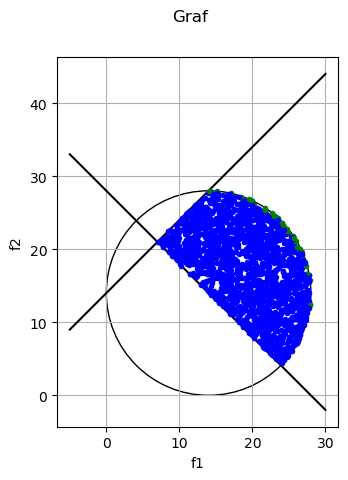

In [59]:
pareto_show()

## 3. Выполнить кластеризацию множества проектов 
C помощью алгоритма многокритериального ранжирования данных на основе вычисления индекса эффективности. В качестве центров кластеров использовать значения индекса эффективности:
$ K_1 = 1; K_2 = 0.85; K_3 = 0.75$

In [17]:
k1 = 1
k2 = 0.85
k3 = 0.75

In [18]:
def klasters():
    
    count1, count2, count3 = 0, 0, 0

    for i in range (number):
        for j in range(number):
            if (i != j):
                if (list[j].x >= list[i].x) and (list[j].y >= list[i].y):
                    list[i].bi = list[i].bi + 1
                    j1 = j + 1
                    
        list[i].findex = 1 / (1 + (list[i].bi / (number - 1)))
        
        if (np.abs(k1 - list[i].findex) < np.abs(k2 - list[i].findex)) and (np.abs(k1 - list[i].findex) < np.abs(k3 - list[i].findex)):
            list[i].klaster = 1
            count1 += 1
        elif (np.abs(k2 - list[i].findex) < np.abs(k1 - list[i].findex)) and (np.abs(k2 - list[i].findex) < np.abs(k3 - list[i].findex)):
            list[i].klaster = 2
            count2 += 1
        elif (np.abs(k3 - list[i].findex) < np.abs(k1 - list[i].findex)) and (np.abs(k3 - list[i].findex) < np.abs(k2 - list[i].findex)):
            list[i].klaster = 3
            count3 += 1
        
    return count1, count2, count3
            

    

In [19]:
k = klasters()
print(f'Размер кластеров: \n№1 - {k[0]} - точек, \n№2 - {k[1]} - точек, \n№3 -{k[2]} - точек')

Размер кластеров: 
№1 - 192 - точек, 
№2 - 165 - точек, 
№3 -143 - точек


In [20]:
pt2 = PrettyTable()
pt2.field_names = ['id', 'f1','f2', 'bi', 'F', 'klaster №']
for i in range(number):
    pt2.add_row([i + 1, list[i].x, list[i].y, list[i].bi, list[i].findex, list[i].klaster])
print(pt2)

+-----+--------------------+--------------------+-----+--------------------+-----------+
|  id |         f1         |         f2         |  bi |         F          | klaster № |
+-----+--------------------+--------------------+-----+--------------------+-----------+
|  1  | 20.271953601624762 | 21.781932558669016 |  27 | 0.9486692015209126 |     1     |
|  2  | 19.002256821417124 | 16.114215068812218 | 123 | 0.802250803858521  |     2     |
|  3  | 26.53449999143696  | 12.02926561834943  |  9  | 0.9822834645669293 |     1     |
|  4  | 22.26147534901021  | 7.599614007829444  | 108 | 0.8220757825370676 |     2     |
|  5  |  8.29648784570443  | 20.936905183562338 | 166 | 0.750375939849624  |     3     |
|  6  | 18.15091457359496  | 22.881878651912253 |  38 | 0.9292364990689013 |     1     |
|  7  | 25.603998389950466 | 8.540484579316448  |  32 | 0.9397363465160075 |     1     |
|  8  | 15.477180871654383 | 22.652673204974562 |  64 | 0.8863232682060391 |     2     |
|  9  | 11.6381678161

In [21]:
def klasters_show():
    
    y1 = lambda x: n + x
    y2 = lambda x: (n * 2) - x
    
    fig, axes = plt.subplots()
    x = np.linspace(-5, 30, 2)
    
    plt.plot(x, y1(x), 'k')
    plt.plot(x, y2(x), 'k')
    circle = plt.Circle((n, n), n, color='k', fill=False)
    
    axes.set_aspect(1)
    axes.add_artist(circle)
    
    for i in range(number):
        if list[i].klaster == 1:
            plt.plot(list[i].x, list[i].y, '.', color='g')
        elif list[i].klaster == 2:
            plt.plot(list[i].x, list[i].y, '.', color='orange')
        elif list[i].klaster == 3:
            plt.plot(list[i].x, list[i].y, '.', color='r')
        
        if number <= 20:
            plt.text(list[i].x + 0.1, list[i].y + 0.1, i + 1)
            
    plt.grid(True)    
    plt.xlabel('f1')
    plt.ylabel('f2')
    plt.suptitle('Graf')

    plt.show()

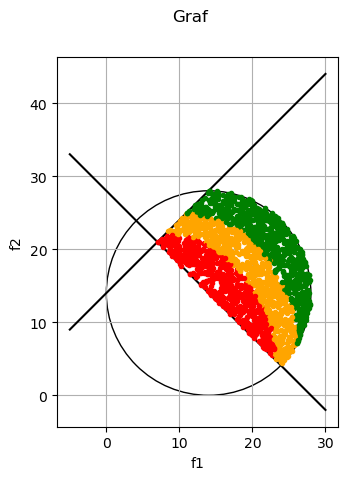

In [64]:
klasters_show()

In [ ]:
В графиках возможны неточности, связанные с нецелочисленным форматом входных данных.